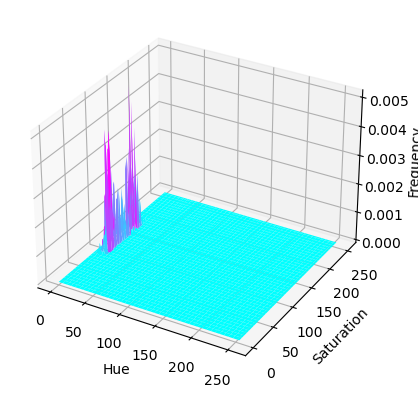

In [261]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def concat_images(images):
    """Generate composite of all supplied images."""
    # Get the widest width.
    width = max(image.width for image in images)
    # Add up all the heights.
    height = sum(image.height for image in images)
    composite = Image.new('RGB', (width, height))
    # Paste each image below the one before it.
    y = 0
    for image in images:
        composite.paste(image, (0, y))
        y += image.height
    return composite

train = ["train2.png","train3.png","train4.png","train5.png","train6.png","train7.png","train9.png"]
images = [Image.open(path).resize((50,50)) for path in train]
composite = concat_images(images)
composite.save("final.png")

# Load the image
img = Image.open('final.png')

# Convert the image to HSV color space
hsv_img = img.convert('HSV')

# Get the Hue and Saturation channels
h, s, _ = hsv_img.split()

# Define the number of bins for Hue and Saturation channels
hue_bins = 256
sat_bins = 256

# Create a 3D histogram for Hue and Saturation channels
hist = np.zeros((hue_bins, sat_bins, 1))

# Loop through each pixel in the image and update the histogram
for i in range(img.size[0]):
    for j in range(img.size[1]):
        hist[h.getpixel((i,j)), s.getpixel((i,j)), 0] += 1

# Normalize the histogram
hist_norm = hist / np.sum(hist)



# Load the image and create the 3D histogram
# (Code for creating the histogram goes here)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create arrays for the x, y, and z coordinates of the bins
x = np.arange(hue_bins)
y = np.arange(sat_bins)
x, y = np.meshgrid(x, y)
z = hist_norm.reshape((hue_bins, sat_bins))

# Transpose the z array
z = np.transpose(z)

# Plot the 3D histogram
ax.plot_surface(x, y, z, cmap='cool', linewidth=0)

# Set the axis labels
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Frequency')

# Show the plot
plt.show()

tests = ['joy1.bmp','gun1.bmp','pointer1.bmp','Handshake_0.jpg','huddle.png']
for file in tests:
    img = Image.open(file)
    xx=img.size[0]
    yy=img.size[1]
    sc=200/xx
    img = img.resize((200,int(yy*sc)))
    imghsv = img.convert('HSV')
    p = np.array(imghsv)
    for i,x in enumerate(p):
        for j,y in enumerate(x):
            if hist_norm[y[0],y[1],0] > 0:
                p[i,j][0] = 255
                p[i,j][1] = 255
                p[i,j][2] = 255
            else:
                p[i,j][0] = 0
                p[i,j][1] = 0
                p[i,j][2] = 0

    img = Image.fromarray(p.astype(np.uint8))
    imgrgb = img.convert('RGB')
    filen = "result_"+file
    img.save(filen)
